In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data processing/preprocessed.csv')

In [4]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,False,6
145456,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,False,6
145457,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,False,6
145458,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False,6


In [5]:
X = df.drop('RainTomorrow', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
from sklearn.decomposition import PCA
explained_varience = []

for n in range(1, 22):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)

    explained_varience.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience Explained')

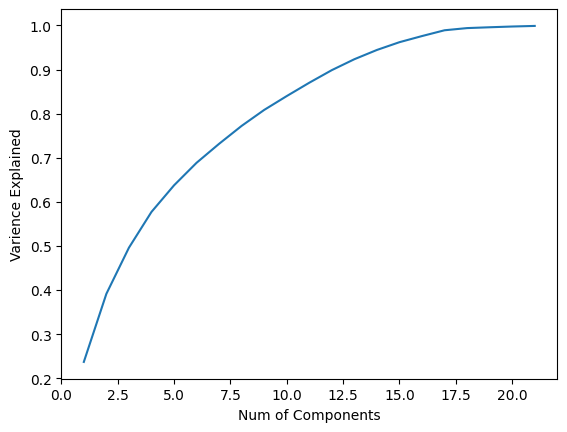

In [9]:

plt.plot(range(1, 22), explained_varience)
plt.xlabel('Num of Components')
plt.ylabel('Varience Explained')

In [23]:
pca = PCA(n_components=13)

In [24]:
pca_result = pca.fit_transform(scaled_X)

In [25]:
np.sum(pca.explained_variance_ratio_)

0.9233642867332646

We are keeping 92.33% varience by reducing the dimention to 13

In [33]:
pca_result

array([[ 0.74998892,  1.23009925, -2.09342555, ...,  1.97056624,
        -0.31211334, -0.06570926],
       [ 1.00700904, -0.05283152, -2.69846819, ...,  1.49544813,
         0.80085641,  0.98732954],
       [ 1.61493052,  1.04281771, -1.91855409, ...,  1.61149241,
        -0.09541166,  0.69202932],
       ...,
       [ 0.72400572, -2.18620305, -1.34539796, ...,  1.33517141,
        -1.34421013, -0.17370147],
       [ 1.13828541, -2.77377298, -0.73717545, ..., -0.1899902 ,
        -0.62588325, -0.23686132],
       [-0.1244533 , -0.62800824,  0.81239626, ...,  0.20703909,
        -0.10537721,  0.04025061]])

In [36]:
index = []

for i in range(1, 14):
    index.append(f'PC{i}')


In [39]:
new_df = pd.DataFrame(pca_result, columns=index)
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.749989,1.230099,-2.093426,-0.298704,0.536319,0.481063,-1.064279,0.217299,-1.220448,-1.194645,1.970566,-0.312113,-0.065709
1,1.007009,-0.052832,-2.698468,-1.253686,0.384879,0.264372,-1.472700,-0.093843,-0.826070,-0.979376,1.495448,0.800856,0.987330
2,1.614931,1.042818,-1.918554,0.034041,-0.769160,0.998345,-1.182415,-0.221554,-1.643123,-0.345244,1.611492,-0.095412,0.692029
3,2.346759,-2.545315,0.220300,0.442592,0.807228,1.385255,-2.293140,0.289938,1.331965,1.334661,-0.895851,-0.577264,0.752065
4,1.170310,1.643348,-0.231587,-1.855438,-0.417431,2.028205,-1.078809,-0.647345,-0.709093,-0.462753,-0.012471,-0.994412,-1.481143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083345,-3.717788,0.178347,1.472794,1.058897,1.243298,0.465545,1.173320,-1.592043,0.183161,0.240572,0.156753,0.381497
145456,0.017594,-2.530976,-1.493767,-0.974144,0.510472,2.001109,0.665878,-0.344729,1.313493,-2.063659,-0.013646,-1.574120,-0.178437
145457,0.724006,-2.186203,-1.345398,-0.704922,0.761860,1.646034,0.585660,0.136316,0.549115,-1.498885,1.335171,-1.344210,-0.173701
145458,1.138285,-2.773773,-0.737175,-0.401409,1.367802,1.104264,0.423048,0.634580,-0.788424,-1.277074,-0.189990,-0.625883,-0.236861


In [40]:
new_df['RainTomorrow'] = df['RainTomorrow']

In [41]:
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.749989,1.230099,-2.093426,-0.298704,0.536319,0.481063,-1.064279,0.217299,-1.220448,-1.194645,1.970566,-0.312113,-0.065709,False
1,1.007009,-0.052832,-2.698468,-1.253686,0.384879,0.264372,-1.472700,-0.093843,-0.826070,-0.979376,1.495448,0.800856,0.987330,False
2,1.614931,1.042818,-1.918554,0.034041,-0.769160,0.998345,-1.182415,-0.221554,-1.643123,-0.345244,1.611492,-0.095412,0.692029,False
3,2.346759,-2.545315,0.220300,0.442592,0.807228,1.385255,-2.293140,0.289938,1.331965,1.334661,-0.895851,-0.577264,0.752065,False
4,1.170310,1.643348,-0.231587,-1.855438,-0.417431,2.028205,-1.078809,-0.647345,-0.709093,-0.462753,-0.012471,-0.994412,-1.481143,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083345,-3.717788,0.178347,1.472794,1.058897,1.243298,0.465545,1.173320,-1.592043,0.183161,0.240572,0.156753,0.381497,False
145456,0.017594,-2.530976,-1.493767,-0.974144,0.510472,2.001109,0.665878,-0.344729,1.313493,-2.063659,-0.013646,-1.574120,-0.178437,False
145457,0.724006,-2.186203,-1.345398,-0.704922,0.761860,1.646034,0.585660,0.136316,0.549115,-1.498885,1.335171,-1.344210,-0.173701,False
145458,1.138285,-2.773773,-0.737175,-0.401409,1.367802,1.104264,0.423048,0.634580,-0.788424,-1.277074,-0.189990,-0.625883,-0.236861,False


In [43]:
new_df.to_csv('../../data processing/reduced_dataset.csv', index=False)